<a href="https://colab.research.google.com/github/cotucotudu/inno-bootcamp-physics/blob/main/calculus/calculus_and_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для физики


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Checkbox

def make_axes(xrange, yrange, title="", xlab="x", ylab="y", aspect=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_xlim(xrange)
    ax.set_ylim(yrange)
    ax.grid(True)
    if aspect == "equal":
        ax.set_aspect('equal', adjustable='box')
    return fig, ax


## 1. Пределы

В реальной жизни много величин **меняются во времени**: положение, цена, температура. Чтобы **измерять скорость изменения**, нам нужна **производная**, но она строится на понятии **предела**.

### 1.1. Предел последовательности
Рассмотрим последовательность $a_n = \frac{1}{n} $:  $1, \frac12, \frac13, \frac14, \dots$.  
На числовой прямой её члены **стремятся к нулю** при $ n \to \infty$: $\lim_{n\to\infty} a_n = 0$.

Не у всех последовательностей есть предел: например, $1, -1, 1, -1, \dots$ — **не сходится**.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Checkbox


GREENFIELD = '#00B140'

def make_axes(xrange, yrange, title="", xlab="x", ylab="y", aspect=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(title, fontsize=16, color=GREENFIELD)
    ax.set_xlabel(xlab, fontsize=12, color=GREENFIELD)
    ax.set_ylabel(ylab, fontsize=12, color=GREENFIELD)
    ax.set_xlim(xrange)
    ax.set_ylim(yrange)
    ax.grid(True, linestyle='--', alpha=0.7)
    if aspect == "equal":
        ax.set_aspect('equal', adjustable='box')
    return fig, ax

def plot_sequences(n_max=30, alt=False):
    ns = np.arange(1, n_max + 1)
    if not alt:
        vals = 1.0 / ns
        title = r"Последовательность $a_n = 1/n$"
    else:
        vals = (-1.0) ** ns
        title = r"Последовательность $a_n = (-1)^n$ (не имеет предела)"

    fig, ax = make_axes(
        xrange=[0, n_max + 1],
        yrange=[min(vals.min(), -1.1), max(vals.max(), 1.1)],
        title=title,
        xlab="n",
        ylab="a_n"
    )

    ax.plot(ns, vals, marker='o', linestyle='-', color=GREENFIELD, label='a_n')
    ax.axhline(0, color='gray', linestyle='--')
    ax.legend()
    plt.show()

interact(plot_sequences,
         n_max=IntSlider(value=30, min=5, max=200, step=1, description="n_max"),
         alt=Checkbox(value=False, description="Альтернативная: (-1)^n"))


interactive(children=(IntSlider(value=30, description='n_max', max=200, min=5), Checkbox(value=False, descript…

<function __main__.plot_sequences(n_max=30, alt=False)>

### 1.2. Предел функции

Пусть $y = y(x)$. Говорят, что $\lim_{x\to A} y(x) = B$, если при $x\to A$ значения $y(x)$ **втекают** к $B $.

**Примеры:**
- $\lim_{x\to 2} x^2 = 4 $
- $\lim_{x\to 0} \frac{\sin x}{x} = 1$ — *первый замечательный предел*, важный в анализе.
- $\lim_{x\to 2} \frac{x^2-4}{x-2} = 4 $ — «устранимая неопределённость» через сокращение.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown

def f_choice(name):
    if name == "x^2":
        return lambda x: x**2
    if name == "sin(x)/x (sinc)":
        def sinc(x):
            out = np.ones_like(x)
            mask = x != 0
            out[mask] = np.sin(x[mask]) / x[mask]
            return out
        return sinc
    if name == "(x^2-4)/(x-2)":
      def h(x):
          out = np.full_like(x, np.nan, dtype=float)
          mask = (x != 2)
          out[mask] = (x[mask]**2 - 4) / (x[mask] - 2)
          return out
      return h
    if name == "1/x (x→∞)":
        return lambda x: 1.0 / x
    if name == "|x|/x":
        def sign_func(x):
            out = np.full_like(x, np.nan, dtype=float)
            mask = x != 0
            out[mask] = np.sign(x[mask])
            return out
        return sign_func
    if name == "e^x":
        return lambda x: np.exp(x)
    if name == "ln(1+x)/x":
        def ln_ratio(x):
            out = np.full_like(x, np.nan, dtype=float)
            mask = x != 0
            out[mask] = np.log(1 + x[mask]) / x[mask]
            out[~mask] = 1  # предел при x→0
            return out
        return ln_ratio
    if name == "(1-cos(x))/x^2":
        def cos_ratio(x):
            out = np.full_like(x, np.nan, dtype=float)
            mask = x != 0
            out[mask] = (1 - np.cos(x[mask])) / x[mask]**2
            out[~mask] = 0.5  # предел при x→0
            return out
        return cos_ratio
    raise ValueError("unknown function")

# Общая функция построения графика
def limit_plot(func_name="sin(x)/x (sinc)", A=0.0, radius=1.0, n=600):
    f = f_choice(func_name)
    xs = np.linspace(A - radius, A + radius, n) if func_name != "1/x (x→∞)" else np.linspace(1, A, n)
    ys = f(xs)

    # Оценка "кандидата на предел"
    if func_name != "1/x (x→∞)":
        mid_mask = (xs > A - radius*0.1) & (xs < A + radius*0.1)
    else:
        mid_mask = xs > A*0.9
    L_est = np.nanmean(ys[mid_mask]) if np.any(mid_mask) else np.nan

    # Построение графика
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(xs, ys, color=GREENFIELD, lw=2, label='y(x)')

    if not np.isnan(L_est):
        ax.axhline(L_est, color='orange', linestyle='--', lw=2, label=f'оценка L ≈ {L_est:.4f}')

    # Область около точки A
    ax.axvspan(A - radius, A + radius, color='lightblue', alpha=0.2)

    # Оформление
    ax.set_title(f"Предел функции около x→{A} (функция: {func_name})", fontsize=16, color=GREENFIELD)
    ax.set_xlabel("x", fontsize=12, color=GREENFIELD)
    ax.set_ylabel("y", fontsize=12, color=GREENFIELD)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    plt.show()

# Виджеты для интерактивности
interact(limit_plot,
         func_name=Dropdown(options=[
             "x^2", "sin(x)/x (sinc)", "(x^2-4)/(x-2)", "1/x (x→∞)",
             "|x|/x", "e^x", "ln(1+x)/x", "(1-cos(x))/x^2"
         ],
         value="sin(x)/x (sinc)", description="Функция"),
         A=FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description="A"),
         radius=FloatSlider(value=1.0, min=0.05, max=3.0, step=0.05, description="радиус"),
         n=IntSlider(value=600, min=5, max=1000, step=1, description="точек"))


interactive(children=(Dropdown(description='Функция', index=1, options=('x^2', 'sin(x)/x (sinc)', '(x^2-4)/(x-…

<function __main__.limit_plot(func_name='sin(x)/x (sinc)', A=0.0, radius=1.0, n=600)>

### 1.3. Связь предела функции с пределом последовательности

Если $lim_{x\to A} y(x) = B $, то **для любой последовательности** $x_n\to A$ верно $y(x_n)\to B$.  
Пример: $x_n = (0.1)^n \Rightarrow \frac{\sin x_n}{x_n} \to 1$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def sequence_limit_check(base=0.1, terms=8):
    n = np.arange(1, terms + 1)
    xs = base ** n
    ys = np.sin(xs) / xs

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(n, ys, marker='o', linestyle='-', color=GREENFIELD, lw=2, label=r'$\sin(x_n)/x_n$')

    # Горизонтальная линия y=1 (предел)
    ax.axhline(1.0, color='orange', linestyle='--', lw=2, label='предел → 1')

    ax.set_title(r"Проверка: $x_n=b^n \Rightarrow \sin(x_n)/x_n \to 1$", fontsize=16, color=GREENFIELD)
    ax.set_xlabel("n", fontsize=12, color=GREENFIELD)
    ax.set_ylabel(r"$\sin(x_n)/x_n$", fontsize=12, color=GREENFIELD)
    ax.set_xlim([0, terms + 1])
    ax.set_ylim([min(ys.min(), 0.8), max(ys.max(), 1.05)])
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

    plt.show()

interact(sequence_limit_check,
         base=FloatSlider(value=0.1, min=0.05, max=0.9, step=0.05, description="b"),
         terms=IntSlider(value=8, min=4, max=30, step=1, description="чисел"))


interactive(children=(FloatSlider(value=0.1, description='b', max=0.9, min=0.05, step=0.05), IntSlider(value=8…

<function __main__.sequence_limit_check(base=0.1, terms=8)>

## 2. Производная: мгновенная скорость и численное приближение

Рассмотрим путь $s(t)=t^3$. Средняя скорость на $[t, t+\Delta t]$: $\frac{\Delta s}{\Delta t}$.  
При $\Delta t\to 0$ получаем **мгновенную скорость** $V(t)=\lim_{\Delta t\to 0}\frac{s(t+\Delta t)-s(t)}{\Delta t} = 3t^2$.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

GREENFIELD = '#00B140'  # путь
ORANGE = '#FF7F00'      # скорость
BLUE = '#0072CE'        # касательная и точка

def s(t):
    return t**3

def v(t):
    return 3*t**2

def path_and_velocity_dual(t0=2.0):
    t = np.linspace(t0-3, t0+3, 400)
    s_vals = s(t)
    v_vals = v(t)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True)

    # --- График пути ---
    ax1.plot(t, s_vals, color=GREENFIELD, lw=3, label=r'$s(t)=t^3$')

    # Касательная
    s0 = s(t0)
    v0 = v(t0)
    tangent = v0 * (t - t0) + s0
    ax1.plot(t, tangent, color=BLUE, linestyle='--', lw=2, label=f'касательная в t0={t0:.2f}')

    # Точка на пути
    ax1.scatter([t0], [s0], color=BLUE, zorder=5, label='точка t0')
    ax1.set_ylabel('s(t)', fontsize=12)
    ax1.set_title('Путь и касательная', fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()

    # --- График скорости ---
    ax2.plot(t, v_vals, color=ORANGE, lw=3, label=r'$v(t)=s\'(t)$')
    ax2.scatter([t0], [v0], color=BLUE, zorder=5, label=f'v(t0)={v0:.2f}')
    ax2.set_xlabel('t', fontsize=12)
    ax2.set_ylabel('v(t)', fontsize=12)
    ax2.set_title('Скорость как производная пути', fontsize=14)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()

    plt.tight_layout()
    plt.show()

interact(path_and_velocity_dual,
         t0=FloatSlider(value=2.0, min=-3.0, max=10.0, step=0.1, description="t0"))


interactive(children=(FloatSlider(value=2.0, description='t0', max=10.0, min=-3.0), Output()), _dom_classes=('…

<function __main__.path_and_velocity_dual(t0=2.0)>

### 2.1. Численная производная и касательная

Определение: $ f'(a)=\lim_{h\to 0}\dfrac{f(a+h)-f(a)}{h} $  
Численно используем **симметричную разность** $ \frac{f(a+h)-f(a-h)}{2h} $   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

color_path = "#0057b7"      # синий
color_tangent = "#ff6f00"   # оранжевый
color_point_a = "#ff6f00"   # оранжевый
color_point_ah = "#ffa500"  # светло-оранжевый для a+h

def fun_choice(name):
    if name == "x^2":
        return lambda x: x**2
    if name == "sin(x)":
        return np.sin
    if name == "exp(x)":
        return np.exp
    if name == "e^{-x^2}":
        return lambda x: np.exp(-x**2)
    raise ValueError("unknown")

def tangent_plot(fname="x^2", a=0.5, h=1e-2, x_min=-3.0, x_max=3.0):
    f = fun_choice(fname)
    xs = np.linspace(x_min, x_max, 800)
    ys = f(xs)

    f_a = f(a)
    f_ah = f(a+h)
    deriv = (f_ah - f_a)/(h)
    tan = f_a + deriv*(xs - a)

    plt.figure(figsize=(9,5))
    plt.plot(xs, ys, color=color_path, lw=2, label="f(x)")
    plt.plot(xs, tan, color=color_tangent, lw=2, linestyle="--", label="Касательная (численно)")

    # точки a и a+h
    plt.scatter([a], [f_a], color=color_point_a, s=80, zorder=5, label="f(a)")
    plt.scatter([a+h], [f_ah], color=color_point_ah, s=80, zorder=5, label="f(a+h)")

    plt.title(f"Численная производная: f'(a)≈{deriv:.5g} при a={a}", fontsize=14)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

interact(tangent_plot,
         fname=Dropdown(options=["x^2", "sin(x)", "exp(x)", "e^{-x^2}"], value="e^{-x^2}", description="f(x)"),
         a=FloatSlider(value=0.5, min=-2.5, max=2.5, step=0.05, description="a"),
         h=FloatSlider(value=1e-2, min=1e-4, max=5e-1, step=1e-4, readout_format=".4f", description="h"),
         x_min=FloatSlider(value=-3.0, min=-10.0, max=0.0, step=0.5, description="xmin"),
         x_max=FloatSlider(value=3.0, min=0.0, max=10.0, step=0.5, description="xmax"))


interactive(children=(Dropdown(description='f(x)', index=3, options=('x^2', 'sin(x)', 'exp(x)', 'e^{-x^2}'), v…

<function __main__.tangent_plot(fname='x^2', a=0.5, h=0.01, x_min=-3.0, x_max=3.0)>

## 3. Интеграл как площадь под кривой

Интеграл на \([A,B]\) — это **предел римановых сумм**. Приближаем площадь прямоугольниками (левые/правые/средние) или **трапециями**.

Ниже можно менять функцию, интервал и число разбиений.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown, Checkbox

color_func = "#0057b7"       # синий
color_rect = "#ff6f00"       # оранжевый
color_trap = "#ffa500"       # светло-оранжевый

def fint_choice(name):
    if name == "x^2":
        return lambda x: x**2
    if name == "sin(x)":
        return np.sin
    if name == "cos(x)":
        return np.cos
    if name == "|x|":
        return np.abs
    raise ValueError("unknown")

def riemann_plot(fname="cos(x)", A=0.0, B=np.pi/2, n=10, method="mid", show_trap=False):
    f = fint_choice(fname)
    xs = np.linspace(A, B, 1000)
    ys = f(xs)

    x_edges = np.linspace(A, B, n+1)
    dx = (B - A)/n

    if method == "left":
        x_samples = x_edges[:-1]
    elif method == "right":
        x_samples = x_edges[1:]
    else:
        x_samples = 0.5*(x_edges[:-1] + x_edges[1:])

    approx = np.sum(f(x_samples) * dx)

    # Трапец. правило
    trap_approx = None
    if show_trap:
        fx_edges = f(x_edges)
        trap_approx = dx*(0.5*fx_edges[0] + fx_edges[1:-1].sum() + 0.5*fx_edges[-1])

    plt.figure(figsize=(9,5))
    plt.plot(xs, ys, color=color_func, lw=2, label="f(x)")

    # Рисуем прямоугольники
    for x in x_samples:
        if method == "left":
            x0 = x
        elif method == "right":
            x0 = x - dx
        else:
            x0 = x - dx/2
        y_val = f(x)
        plt.fill([x0, x0, x0+dx, x0+dx], [0, y_val, y_val, 0], color=color_rect, alpha=0.3)

    # Рисуем трапеции
    if show_trap:
        for i in range(n):
            plt.fill([x_edges[i], x_edges[i], x_edges[i+1], x_edges[i+1]],
                     [0, f(x_edges[i]), f(x_edges[i+1]), 0],
                     color=color_trap, alpha=0.2)
        plt.plot(x_edges, f(x_edges), 'o', color=color_trap, label="узлы для трапеций")

    plt.title(f"Риманова сумма ({method}), n={n}; прибл. интеграл ≈ {approx:.6f}" +
              (f" | трапеции ≈ {trap_approx:.6f}" if trap_approx is not None else ""), fontsize=14)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

interact(riemann_plot,
         fname=Dropdown(options=["x^2", "sin(x)", "cos(x)", "|x|"], value="cos(x)", description="f(x)"),
         A=FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description="A"),
         B=FloatSlider(value=np.pi/2, min=-5.0, max=5.0, step=0.1, description="B"),
         n=IntSlider(value=10, min=2, max=200, step=1, description="n"),
         method=Dropdown(options=[("левые","left"), ("правые","right"), ("средние","mid")], value="mid", description="метод"),
         show_trap=Checkbox(value=False, description="добавить трапеции"))


interactive(children=(Dropdown(description='f(x)', index=2, options=('x^2', 'sin(x)', 'cos(x)', '|x|'), value=…

<function __main__.riemann_plot(fname='cos(x)', A=0.0, B=1.5707963267948966, n=10, method='mid', show_trap=False)>

## 4. Векторы: проекции, сумма, скалярное и векторное произведения

### 4.1. Проекции
Проекция на ось $X$: $a_x = a\cos\varphi$.  
Свойства: линейность по сумме и по скалярному множителю.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

color_u = "#0057b7"       # синий
color_u_proj = "#87cefa"  # светло-синий для проекций
color_v = "#ff6f00"       # оранжевый
color_v_proj = "#ffcc80"  # светло-оранжевый для проекций
color_axes = "#555555"    # серый для осей

def vector_projections(u1=3.0, u2=2.0, v1=1.5, v2=3.5):
    u = np.array([u1, u2], dtype=float)
    v = np.array([v1, v2], dtype=float)

    plt.figure(figsize=(7,7))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    # масштабирование
    xr = [0, max(u[0], v[0]) + 2]
    yr = [0, max(u[1], v[1]) + 2]
    plt.xlim(xr)
    plt.ylim(yr)
    plt.grid(True, alpha=0.3)

    # оси координат
    plt.axhline(0, color=color_axes, linewidth=1)
    plt.axvline(0, color=color_axes, linewidth=1)

    def add_arrow(origin, vec, color, label):
        plt.arrow(origin[0], origin[1], vec[0], vec[1],
                  head_width=0.15, length_includes_head=True, color=color, label=label)
        plt.plot(origin[0]+vec[0], origin[1]+vec[1], 'o', color=color)

    add_arrow([0,0], u, color_u, "u")
    add_arrow([0,0], v, color_v, "v")

    # проекции на оси
    plt.plot([0, u[0]], [0, 0], color=color_u_proj, linestyle='--', label="u_x")
    plt.plot([u[0], u[0]], [0, u[1]], color=color_u_proj, linestyle='--', label="u_y")

    plt.plot([0, v[0]], [0, 0], color=color_v_proj, linestyle='--', label="v_x")
    plt.plot([v[0], v[0]], [0, v[1]], color=color_v_proj, linestyle='--', label="v_y")

    plt.title("Проекции векторов на оси координат")
    plt.legend()
    plt.show()

    print(f"u = {u}, проекции: u_x={u[0]}, u_y={u[1]}")
    print(f"v = {v}, проекции: v_x={v[0]}, v_y={v[1]}")

interact(vector_projections,
         u1=FloatSlider(value=3.0, min=-5.0, max=5.0, step=0.1, description="u_x"),
         u2=FloatSlider(value=2.0, min=-5.0, max=5.0, step=0.1, description="u_y"),
         v1=FloatSlider(value=1.5, min=-5.0, max=5.0, step=0.1, description="v_x"),
         v2=FloatSlider(value=3.5, min=-5.0, max=5.0, step=0.1, description="v_y"))


interactive(children=(FloatSlider(value=3.0, description='u_x', max=5.0, min=-5.0), FloatSlider(value=2.0, des…

<function __main__.vector_projections(u1=3.0, u2=2.0, v1=1.5, v2=3.5)>


### 4.2. Сумма векторов (2D)
**Сумма векторов** $\vec{a} = (a_1, a_2, \dots, a_n)$
и $\vec{b} = (b_1, b_2, \dots, b_n)$ определяется как вектор
$$\vec{a} + \vec{b} = (a_1 + b_1, \; a_2 + b_2, \; \dots, \; a_n + b_n).$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

color_u = "#0057b7"       # синий
color_v = "#ff6f00"       # оранжевый
color_w = "#009e73"       # зеленый
color_para = "#555555"    # серый для параллелограмма

def vectors_2d(u1=2.0, u2=1.0, v1=1.0, v2=2.5):
    u = np.array([u1, u2], dtype=float)
    v = np.array([v1, v2], dtype=float)
    w = u + v

    plt.figure(figsize=(7,7))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    # масштабирование
    xr = [min(0,u[0],v[0],w[0]) - 1, max(0,u[0],v[0],w[0]) + 1]
    yr = [min(0,u[1],v[1],w[1]) - 1, max(0,u[1],v[1],w[1]) + 1]
    plt.xlim(xr)
    plt.ylim(yr)
    plt.grid(True, alpha=0.3)

    def add_arrow(origin, vec, color, label):
        plt.arrow(origin[0], origin[1], vec[0], vec[1],
                  head_width=0.15, length_includes_head=True, color=color, label=label)
        plt.plot(origin[0]+vec[0], origin[1]+vec[1], 'o', color=color)  # конец вектора

    add_arrow(np.array([0,0]), u, color_u, "u")
    add_arrow(np.array([0,0]), v, color_v, "v")
    add_arrow(np.array([0,0]), w, color_w, "u+v")

    plt.plot([u[0], w[0]], [u[1], w[1]], color=color_para, linestyle='dotted')
    plt.plot([v[0], w[0]], [v[1], w[1]], color=color_para, linestyle='dotted')

    plt.title("2D: сложение векторов")
    plt.legend()
    plt.show()

    print(f"u={u}, v={v}, u+v={w}")

interact(vectors_2d,
         u1=FloatSlider(value=2.0, min=-5.0, max=5.0, step=0.1, description="u_x"),
         u2=FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description="u_y"),
         v1=FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description="v_x"),
         v2=FloatSlider(value=2.5, min=-5.0, max=5.0, step=0.1, description="v_y"))


interactive(children=(FloatSlider(value=2.0, description='u_x', max=5.0, min=-5.0), FloatSlider(value=1.0, des…

<function __main__.vectors_2d(u1=2.0, u2=1.0, v1=1.0, v2=2.5)>

### 4.3. Сумма векторов (3D)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from mpl_toolkits.mplot3d import Axes3D

def vectors_3d_matplotlib(ax=1.0, ay=2.0, az=0.0, bx=1.0, by=0.5, bz=2.0):
    a = np.array([ax, ay, az], dtype=float)
    b = np.array([bx, by, bz], dtype=float)
    c = a + b

    fig = plt.figure(figsize=(8,6))
    ax3d = fig.add_subplot(111, projection='3d')

    ax3d.quiver(0,0,0, a[0], a[1], a[2], color='blue', linewidth=2, label='a', arrow_length_ratio=0.1)
    ax3d.quiver(0,0,0, b[0], b[1], b[2], color='orange', linewidth=2, label='b', arrow_length_ratio=0.1)
    ax3d.quiver(0,0,0, c[0], c[1], c[2], color='green', linewidth=2, label='a+b', arrow_length_ratio=0.1)

    ax3d.plot([a[0], c[0]], [a[1], c[1]], [a[2], c[2]], color='gray', linestyle='dotted')
    ax3d.plot([b[0], c[0]], [b[1], c[1]], [b[2], c[2]], color='gray', linestyle='dotted')

    all_coords = np.array([a, b, c, [0,0,0]])
    min_val = all_coords.min() - 1
    max_val = all_coords.max() + 1
    ax3d.set_xlim(min_val, max_val)
    ax3d.set_ylim(min_val, max_val)
    ax3d.set_zlim(min_val, max_val)

    ax3d.set_xlabel('X')
    ax3d.set_ylabel('Y')
    ax3d.set_zlabel('Z')
    ax3d.set_title('3D: сложение векторов')
    ax3d.legend()
    plt.show()

    print(f"a={a}, b={b}, a+b={c}")

interact(vectors_3d_matplotlib,
         ax=FloatSlider(value=1.0, min=-4.0, max=4.0, step=0.1, description="a_x"),
         ay=FloatSlider(value=2.0, min=-4.0, max=4.0, step=0.1, description="a_y"),
         az=FloatSlider(value=0.0, min=-4.0, max=4.0, step=0.1, description="a_z"),
         bx=FloatSlider(value=1.0, min=-4.0, max=4.0, step=0.1, description="b_x"),
         by=FloatSlider(value=0.5, min=-4.0, max=4.0, step=0.1, description="b_y"),
         bz=FloatSlider(value=2.0, min=-4.0, max=4.0, step=0.1, description="b_z"))


interactive(children=(FloatSlider(value=1.0, description='a_x', max=4.0, min=-4.0), FloatSlider(value=2.0, des…

<function __main__.vectors_3d_matplotlib(ax=1.0, ay=2.0, az=0.0, bx=1.0, by=0.5, bz=2.0)>

## 4.4 Скалярное произведение

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

color_a = "#0057b7"   # синий
color_b = "#ff6f00"   # оранжевый
color_angle = "#009e73"  # зеленый

def scalar_product_demo(a1=3.0, a2=1.0, b1=2.0, b2=2.5):
    a = np.array([a1, a2], dtype=float)
    b = np.array([b1, b2], dtype=float)

    dot_product = np.dot(a, b)

    # Длины и угол
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    if norm_a > 0 and norm_b > 0:
        cos_phi = dot_product / (norm_a * norm_b)
        cos_phi = np.clip(cos_phi, -1.0, 1.0)
        phi = np.arccos(cos_phi)
    else:
        phi = np.nan

    plt.figure(figsize=(7,7))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    xr = [min(0,a[0],b[0]) - 1, max(0,a[0],b[0]) + 1]
    yr = [min(0,a[1],b[1]) - 1, max(0,a[1],b[1]) + 1]
    plt.xlim(xr)
    plt.ylim(yr)
    plt.grid(True, alpha=0.3)

    plt.axhline(0, color="gray", linewidth=1)
    plt.axvline(0, color="gray", linewidth=1)

    def add_arrow(origin, vec, color, label):
        plt.arrow(origin[0], origin[1], vec[0], vec[1],
                  head_width=0.15, length_includes_head=True, color=color, label=label)
        plt.plot(origin[0]+vec[0], origin[1]+vec[1], 'o', color=color)

    add_arrow([0,0], a, color_a, "a")
    add_arrow([0,0], b, color_b, "b")

    # угол между векторами (дуга)
    if not np.isnan(phi):
        ang_a = np.arctan2(a[1], a[0])
        ang_b = np.arctan2(b[1], b[0])

        # вычисляем кратчайший угол
        start_angle = ang_a
        end_angle = ang_b
        angle_diff = (end_angle - start_angle) % (2*np.pi)
        if angle_diff > np.pi:
            start_angle, end_angle = end_angle, ang_a
            angle_diff = 2*np.pi - angle_diff

        theta = np.linspace(start_angle, end_angle, 100)
        arc_radius = min(norm_a, norm_b) * 0.3
        arc_x = arc_radius * np.cos(theta)
        arc_y = arc_radius * np.sin(theta)
        plt.plot(arc_x, arc_y, color=color_angle)
        plt.text(
            arc_radius*1.1*np.cos(start_angle + angle_diff/2),
            arc_radius*1.1*np.sin(start_angle + angle_diff/2),
            f"{np.degrees(angle_diff):.1f}°",
            color=color_angle,
            fontsize=12
        )

    plt.text(0.5*(xr[0]+xr[1]), yr[1]-0.5,
             f"a·b = {dot_product:.3f}",
             fontsize=18, fontweight='bold', color="purple",
             ha='center')

    plt.title("Скалярное произведение векторов")
    plt.legend()
    plt.show()

interact(scalar_product_demo,
         a1=FloatSlider(value=3.0, min=-5.0, max=5.0, step=0.1, description="a_x"),
         a2=FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description="a_y"),
         b1=FloatSlider(value=2.0, min=-5.0, max=5.0, step=0.1, description="b_x"),
         b2=FloatSlider(value=2.5, min=-5.0, max=5.0, step=0.1, description="b_y"))


interactive(children=(FloatSlider(value=3.0, description='a_x', max=5.0, min=-5.0), FloatSlider(value=1.0, des…

<function __main__.scalar_product_demo(a1=3.0, a2=1.0, b1=2.0, b2=2.5)>

### 4.5. Векторное произведение (3D)
Определение: вектор $\mathbf{c}=\mathbf{a}\times\mathbf{b}$ перпендикулярен $ \mathbf{a},\mathbf{b}$,  
$|\mathbf{c}|=|\mathbf{a}|\,|\mathbf{b}|\,\sin\varphi $ и ориентирован по **правилу правой тройки**.

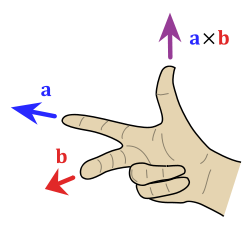


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from mpl_toolkits.mplot3d import Axes3D

def vectors_3d_cross_matplotlib(ax=1.0, ay=0.0, az=0.0, bx=0.0, by=1.0, bz=0.0):
    a = np.array([ax, ay, az], dtype=float)
    b = np.array([bx, by, bz], dtype=float)
    c = np.cross(a, b)

    fig = plt.figure(figsize=(8,6))
    ax3d = fig.add_subplot(111, projection='3d')

    ax3d.quiver(0,0,0, a[0], a[1], a[2], color='blue', linewidth=2, label='a', arrow_length_ratio=0.1)
    ax3d.quiver(0,0,0, b[0], b[1], b[2], color='orange', linewidth=2, label='b', arrow_length_ratio=0.1)
    ax3d.quiver(0,0,0, c[0], c[1], c[2], color='green', linewidth=2, label='a×b', arrow_length_ratio=0.1)

    all_coords = np.array([a, b, c, [0,0,0]])
    min_val = all_coords.min() - 1
    max_val = all_coords.max() + 1
    ax3d.set_xlim(min_val, max_val)
    ax3d.set_ylim(min_val, max_val)
    ax3d.set_zlim(min_val, max_val)

    ax3d.set_xlabel('X')
    ax3d.set_ylabel('Y')
    ax3d.set_zlabel('Z')
    ax3d.set_title('3D: векторное произведение')
    ax3d.legend()
    plt.show()

    print(f"a={a}, b={b}, a×b={c}, |a×b|={np.linalg.norm(c):.4f}")
    print(f"Проверка ортогональности: a·(a×b)={np.dot(a,c):.6f}, b·(a×b)={np.dot(b,c):.6f}")

interact(vectors_3d_cross_matplotlib,
         ax=FloatSlider(value=1.0, min=-3.0, max=3.0, step=0.1, description="a_x"),
         ay=FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description="a_y"),
         az=FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description="a_z"),
         bx=FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description="b_x"),
         by=FloatSlider(value=1.0, min=-3.0, max=3.0, step=0.1, description="b_y"),
         bz=FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description="b_z"))


interactive(children=(FloatSlider(value=1.0, description='a_x', max=3.0, min=-3.0), FloatSlider(value=0.0, des…

<function __main__.vectors_3d_cross_matplotlib(ax=1.0, ay=0.0, az=0.0, bx=0.0, by=1.0, bz=0.0)>

In [ ]:
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def vectors_3d_cross_pyvista(ax=1.0, ay=0.0, az=0.0,
                             bx=0.0, by=1.0, bz=0.0):
    a = np.array([ax, ay, az], dtype=float)
    b = np.array([bx, by, bz], dtype=float)
    c = np.cross(a, b)

    plotter = pv.Plotter(off_screen=True)

    def add_arrow(vec, color):
        arrow = pv.Arrow(start=[0,0,0], direction=vec, scale=np.linalg.norm(vec))
        plotter.add_mesh(arrow, color=color, smooth_shading=True)

    add_arrow(a, 'blue')
    add_arrow(b, 'green')
    add_arrow(c, 'red')

    # добавляем подписи в виде точек с метками
    points = np.array([a, b, c])
    labels = ['a', 'b', 'a×b']
    plotter.add_point_labels(points, labels, font_size=36, point_color='white', text_color='black')

    plotter.add_axes()          # оси
    plotter.set_background('white')

    # сохраняем снимок и показываем через matplotlib
    filename = "vectors.png"
    plotter.show(screenshot=filename)
    img = plt.imread(filename)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(f"a = {a}")
    print(f"b = {b}")
    print(f"a × b = {c}, |a × b| = {np.linalg.norm(c):.4f}")
    print(f"Проверка ортогональности: a·(a×b) = {np.dot(a,c):.6f}, b·(a×b) = {np.dot(b,c):.6f}")

interact(vectors_3d_cross_pyvista,
         ax=FloatSlider(value=1.0, min=-3, max=3, step=0.1),
         ay=FloatSlider(value=0.0, min=-3, max=3, step=0.1),
         az=FloatSlider(value=0.0, min=-3, max=3, step=0.1),
         bx=FloatSlider(value=0.0, min=-3, max=3, step=0.1),
         by=FloatSlider(value=1.0, min=-3, max=3, step=0.1),
         bz=FloatSlider(value=0.0, min=-3, max=3, step=0.1))


interactive(children=(FloatSlider(value=1.0, description='ax', max=3.0, min=-3.0), FloatSlider(value=0.0, desc…

<function __main__.vectors_3d_cross_pyvista(ax=1.0, ay=0.0, az=0.0, bx=0.0, by=1.0, bz=0.0)>